In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_models import LinearBinaryClassifier, LinearOneVsAllClassifier
%matplotlib inline

In [2]:
folders = ['oracle', 'randomAscent', 'greedyAscent', 'gradientDescent']

In [3]:
loss_histories = []
max_acc_histories = []

for folder in folders:
    lh = np.load('binary_experiments/binary-'+folder+"-1-17/loss_history.npy")
    loss_histories.append(lh)
    ma = np.load('binary_experiments/binary-'+folder+"-1-17/max_acc_history.npy")
    max_acc_histories.append(ma)

In [4]:
data_path = "binary_data_2"
models = []
exp_type = "binary"
num_classifiers = 5
alpha = .5

X_exp = np.load(data_path + "/" + "X_exp.npy")
Y_exp = np.load(data_path + "/" + "Y_exp.npy")

for i in xrange(num_classifiers):
    weights = np.load(data_path + "/" + "weights_{}.npy".format(i))
    bias = np.load(data_path + "/" + "bias_{}.npy".format(i))
    if exp_type == "binary":
        model = LinearBinaryClassifier(weights, bias)
    else:
        model = LinearOneVsAllClassifier(10, weights, bias)
    models.append(model)

In [5]:
ensemble_weights = sum([1.0 / num_classifiers * model.weights for model in models ])
ensemble_bias = sum([1.0 / num_classifiers * model.bias for model in models ])

In [19]:
alpha

0.5

In [6]:
ensemble_model = LinearBinaryClassifier(ensemble_weights, ensemble_bias)

In [7]:
ensemble_model.evaluate(X_exp, Y_exp)

1.0

In [8]:
def normalize(noise, alpha):
    for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * alpha
    return noise

noise_ensemble =  -1 * ensemble_model.gradient(X_exp, Y_exp)
noise_ensemble = normalize(noise_ensemble, alpha)

individual_noise = [-1 * model.gradient(X_exp, Y_exp) for model in models]
individual_noise = [normalize(noise, alpha) for noise in individual_noise]

In [9]:
max_model = [max([model.evaluate(X_exp + noise, Y_exp) for model in models]) for noise in individual_noise]

In [10]:
min(max_model)

0.91

In [11]:
ensemble_res_max = max([model.evaluate(X_exp + noise_ensemble, Y_exp) for model in models])
ensemble_res_mean = np.mean([model.evaluate(X_exp + noise_ensemble, Y_exp) for model in models])

In [13]:
ensemble_res_max, ensemble_res_mean

(0.71, 0.588)

In [ ]:
best_model_trend

In [ ]:
ensemble_trend = []
best_model_trend = []

for a in np.linspace(0,1,11):
    noise_ensemble =  -1 * ensemble_model.gradient(X_exp, Y_exp)
    noise_ensemble = normalize(noise_ensemble, a)

    individual_noise = [-1 * model.gradient(X_exp, Y_exp) for model in models]
    individual_noise = [normalize(noise, a) for noise in individual_noise]
    
    ensemble_trend.append(max([model.evaluate(X_exp + noise_ensemble, Y_exp) for model in models]))
    best_model_trend.append(min([max([model.evaluate(X_exp + noise, Y_exp) for model in models]) 
                             for noise in individual_noise]))

In [ ]:
display_folders = ["oracle", 'random ascent', 'greedy ascent', 'reverse hinge loss']
colors = ["blue", "green", "red", "cyan"]
for i, ma in enumerate(max_acc_histories):
    plt.plot(range(100), ma, color=colors[i])
plt.plot(range(100), [ensemble_trend[5]] * 100, linestyle="--", color="purple")
plt.plot(range(100), [best_model_trend[5]] * 100, linestyle="--", color="black")
# plt.legend(display_folders + ["ensemble baseline"], loc="right", bbox_to_anchor=(1,.55), fontsize=8)
plt.title("Universal Noise Linear Binary Classifiers")
plt.ylabel("Max Accuracy")
plt.xlabel("MWU Round")

In [ ]:
max_acc_histories[0][-1]

In [ ]:
findAlphaEquivalent(ensemble_model, X_exp, Y_exp, .5, .3944)

In [ ]:
for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * .70
print max([model.evaluate(X_exp + noise, Y_exp) for model in models])
    

In [ ]:
loss_histories = []
max_acc_histories = []
results = []

for folder in folders:
    noise_res = []
    for x in ["0.1", "0.2", "0.3", "0.4", "0.6", "0.7", "0.8", "0.9", "1.0"]:
        ma = np.load('binary_experiments/binary-untargeted-'+folder+"-{}".format(x)+"-2-3/acc_history.npy")
        noise_res.append(ma[-1])
    results.append(noise_res)


In [17]:
oracle_noise = np.load("binary_experiments/binary-oracle-1-17/noise.npy")

In [22]:
oracle_res = [[model.evaluate(X_exp + noise, Y_exp) for model in models]for noise in oracle_noise]

In [33]:
oracle_max = []
oracle_mean = []

oracle_max.append(max(oracle_res[0]))
oracle_mean.append(np.mean(oracle_res[0]))

for i in range(1,100):
    res = np.mean(oracle_res[:i], axis=0)
    oracle_max.append(max(res))
    oracle_mean.append(np.mean(res))

# oracle_max = [max(res) for res in oracle_res]
# oracle_mean = [np.mean(res) for res in oracle_res]

In [31]:
len(oracle_max)

99

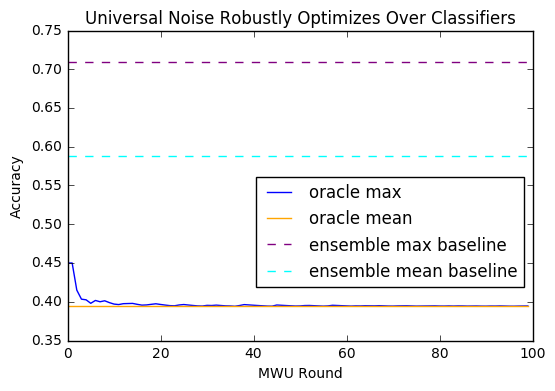

In [38]:
plt.plot(range(100), oracle_max, color="blue")
plt.plot(range(100), oracle_mean, color="orange")
plt.plot(range(100), [ensemble_res_max] * 100, linestyle="--", color="purple")
plt.plot(range(100), [ensemble_res_mean] * 100, linestyle="--", color="cyan")
plt.legend(["oracle max", "oracle mean",  "ensemble max baseline", "ensemble mean baseline"], 
           loc="right", bbox_to_anchor=(1,.35), fontsize=12)
plt.title("Universal Noise Robustly Optimizes Over Classifiers")
plt.ylabel("Accuracy")
plt.xlabel("MWU Round")

In [16]:
for noise in oracle_noise[4:]:
    print[np.linalg.norm(v) for v in noise][:10]

[0.43477590117135406, 0.4582386101432921, 0.475618084629745, 0.39186102034775977, 0.442891299327648, 0.49255772797026565, 0.4543159551720607, 0.41114541649063996, 0.4617969850543519, 0.4445885381545436]
[0.5166776372835891, 0.5663273339364996, 0.5880519358366438, 0.39186102034775977, 0.5854060383838471, 0.5286035904903984, 0.548127270961174, 0.41114541649063996, 0.5390372321968449, 0.5761560385051284]
[0.5166776372835891, 0.6220352938492841, 0.6917032998444179, 0.39186102034775977, 0.5854060383838471, 0.60672424785705, 0.6639999927007275, 0.41114541649063996, 0.5390372321968449, 0.6845723270449785]
[0.5166776372835891, 0.6220352938492841, 0.7848473556633335, 0.39186102034775977, 0.5854060383838471, 0.60672424785705, 0.6639999927007275, 0.41114541649063996, 0.5390372321968449, 0.7767813996592966]
[0.5166776372835891, 0.6220352938492841, 0.7848473556633335, 0.39186102034775977, 0.5854060383838471, 0.60672424785705, 0.6639999927007275, 0.41114541649063996, 0.5390372321968449, 0.7767813996

In [ ]:
oracle_noise = [X_exp + noise for noise in oracle_noise]

In [ ]:
[np.linalg.norm(n[0]) for n in oracle_noise ]

In [ ]:
plt.imshow(oracle_noise[9][0].reshape(28,28), cmap="gray")

In [ ]:
results[0][:4]

In [ ]:
for i in xrange(len(folders)):
    results[i] = results[i][:4] + [max_acc_histories[i][-1]] + results[i][4:]

In [ ]:
np.linspace(0,1,11)

In [ ]:
display_folders = ["oracle", 'random ascent', 'greedy ascent', 'reverse hinge loss']
colors = ["blue", "green", "red", "cyan"]
for i, r in enumerate(results):
    plt.plot(np.linspace(0, 1, 11), [1.0] + r, color=colors[i])
plt.plot(np.linspace(0, 1, 11), ensemble_trend, linestyle="--", color="purple")
plt.plot(np.linspace(0, 1, 11), best_model_trend, linestyle="--", color="black")
plt.legend(display_folders + ["ensemble baseline", "individual baseline"], loc="right", 
           bbox_to_anchor=(.43,.26), fontsize=10)
plt.title("Untargeted Noise Linear Binary Classifiers")
plt.ylabel("Max Accuracy")
plt.xlabel("Noise Budget")

In [ ]:
def findAlphaEquivalent(ensemble_model, X_exp, Y_exp, alpha, target):
    noise =  -1 * ensemble_model.gradient(X_exp, Y_exp)
    for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * alpha

    res = max([model.evaluate(X_exp + noise, Y_exp) for model in models])
    
    if res > target:
        return findAlphaEquivalent(ensemble_model, X_exp, Y_exp, alpha + .01, target)
    else:
        return alpha
    